In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.ops import distributions
from tensorflow.python.framework.ops import convert_to_tensor

In [13]:
import tensorflow_probability as tfp
tfd  = tfp.distributions
tfpl = tfp.layers

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

4/4 [==============================] - 0s 4ms/step


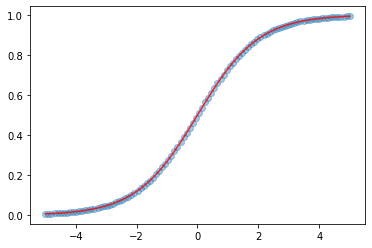

In [22]:
model = Sequential([
    Dense(input_shape=(1,), units=1, activation='sigmoid',
      kernel_initializer = tf.constant_initializer(1),
      bias_initializer = tf.constant_initializer(0))
])

# Plot the function
x_plot = np.linspace(-5, 5, 100)
plt.scatter(x_plot, model.predict(x_plot), alpha=0.4)
plt.plot(x_plot, 1/(1 + np.exp(-x_plot)), color='r', alpha=0.8)
plt.show()

In [6]:
x = np.array([[0]])
x

array([[0]])

In [8]:
y_model = model(x)
y_model

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5]], dtype=float32)>

In [9]:
for _ in range(5):
  print(model.predict(x))

1/1 [==============================] - 0s 264ms/step
[[0.5]]
1/1 [==============================] - 0s 22ms/step
[[0.5]]
1/1 [==============================] - 0s 22ms/step
[[0.5]]
1/1 [==============================] - 0s 27ms/step
[[0.5]]
1/1 [==============================] - 0s 27ms/step
[[0.5]]


4/4 [==============================] - 0s 3ms/step


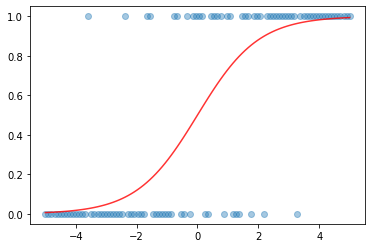

In [23]:
model = Sequential([
    Dense(input_shape=(1,), units=1, activation='sigmoid',
      kernel_initializer = tf.constant_initializer(1),
      bias_initializer = tf.constant_initializer(0)),
    tfpl.DistributionLambda(lambda t: tfd.Bernoulli(probs=t),
                            convert_to_tensor_fn = tfd.Distribution.sample)
])

# Plot the function
x_plot = np.linspace(-5, 5, 100)
plt.scatter(x_plot, model.predict(x_plot), alpha=0.4)
plt.plot(x_plot, 1/(1 + np.exp(-x_plot)), color='r', alpha=0.8)
plt.show()

In [17]:
x = np.array([[0]])
x

array([[0]])

In [18]:
y_model = model(x)
y_model

<tfp.distributions._TensorCoercible 'tensor_coercible' batch_shape=[1, 1] event_shape=[] dtype=int32>

In [20]:
for _ in range(5):
  print(model.predict(x))

1/1 [==============================] - 0s 24ms/step
[[0]]
1/1 [==============================] - 0s 26ms/step
[[1]]
1/1 [==============================] - 0s 27ms/step
[[0]]
1/1 [==============================] - 0s 23ms/step
[[0]]
1/1 [==============================] - 0s 24ms/step
[[0]]


16/16 [==============================] - 0s 5ms/step


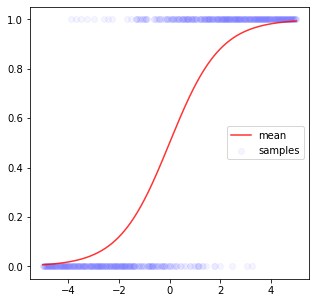

In [21]:
x_train = np.linspace(-5, 5, 500)[:, np.newaxis]
y_train = model.predict(x_train)

# Plot the data and the mean of the distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_train, y_train, alpha=0.04, color='blue', label='samples')
ax.plot(x_train, model(x_train).mean().numpy().flatten(), 
        color='red', alpha=0.8, label='mean')
ax.legend()
plt.show()

In [25]:
model_untrained = Sequential([
    Dense(input_shape=(1,), units=1, activation='sigmoid',
      kernel_initializer = tf.constant_initializer(1),
      bias_initializer = tf.constant_initializer(0)),
    tfpl.DistributionLambda(lambda t: tfd.Bernoulli(probs=t),
                            convert_to_tensor_fn = tfd.Distribution.sample)
])

In [26]:
def nll(y_true, y_pred):
  return -y_pred.log_prob(y_true)

In [29]:
model_untrained.compile(loss=nll, optimizer=RMSprop(learning_rate=0.01))

In [32]:
epochs = [0]
training_weights = [model_untrained.weights[0].numpy()[0, 0]]
training_bias = [model_untrained.weights[1].numpy()[0]]
for epoch in range(100):
    model_untrained.fit(x=x_train, y=y_train, epochs=1, verbose=False)
    epochs.append(epoch)
    training_weights.append(model_untrained.weights[0].numpy()[0, 0])
    training_bias.append(model_untrained.weights[1].numpy()[0])

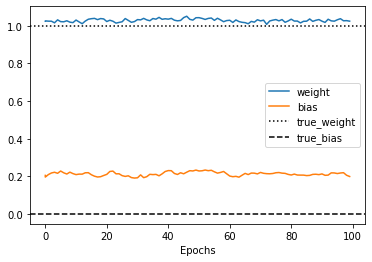

In [33]:
plt.plot(epochs, training_weights, label='weight')
plt.plot(epochs, training_bias, label='bias')
plt.axhline(y=1, label='true_weight', color='k', linestyle=':')
plt.axhline(y=0, label='true_bias', color='k', linestyle='--')
plt.xlabel('Epochs')
plt.legend()
plt.show()